In [24]:
import pandas as pd
from matplotlib import pyplot as plt

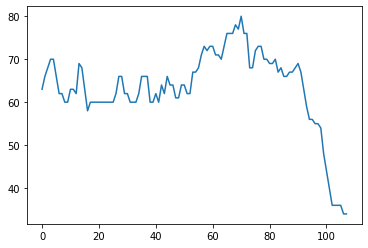

In [36]:
df = pd.read_csv('potato.csv')
array=df['p/kg'].tolist()
array
plt.plot(array)
plt.show()

In [4]:
first_label=(df.loc[1][1]-df.loc[0][1])/df.loc[0][1]
first_label

0.047619047619047616

In [5]:
labels=df['p/kg']
relative_change=[]
temp=[]
for i in range(1,len(labels)):
    result=(labels[i]-labels[i-1])/labels[i-1]
    relative_change.append(result)
    label=-2
    if result>0:
        label=1
    elif result==0:
        label=0
    else:
        label=-1
    temp.append(label)
relative_change.append(0)
new_temp = temp+[0]
new_temp

[1,
 1,
 1,
 0,
 -1,
 -1,
 0,
 -1,
 0,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 0,
 1,
 1,
 0,
 0,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 1,
 0,
 -1,
 0,
 1,
 0,
 1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 0,
 -1,
 1,
 1,
 0,
 0,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 0,
 1,
 1,
 0,
 -1,
 0,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 0,
 1,
 0,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 0,
 0,
 -1,
 0,
 0]

In [20]:
df['yms']=new_temp
df['relative_change']=relative_change
df

,Date,p/kg,labels,yms,relative_change
0,01-Sep,63,0,0,0.047619
1,02-Sep,66,1,1,0.030303
2,03-Sep,68,1,1,0.029412
3,04-Sep,70,1,1,0.000000
4,05-Sep,70,0,0,-0.057143
...,...,...,...,...,...
103,13-Dec,36,0,0,0.000000
104,14-Dec,36,0,0,0.000000
105,15-Dec,36,0,0,-0.055556
106,16-Dec,34,-1,-1,0.000000


In [6]:
x_train,y_train =df['p/kg'],df['labels']

In [7]:
x_train
y_train

0      0
1      1
2      1
3      1
4      0
      ..
103    0
104    0
105    0
106   -1
107    0
Name: labels, Length: 108, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
training_data,testing_data=train_test_split(df,test_size=0.2,shuffle=False)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 86
No. of testing examples: 22


In [26]:
X_train,Y_train,X_test,Y_test=training_data['p/kg'],training_data['yms'],testing_data['p/kg'],testing_data['yms']


In [23]:
# KNN classifer
import numpy as np
def euclidean_dist(X_test, X_train):
  dists = np.add(np.sum(X_test ** 2, axis=1, keepdims=True), np.sum(X_train ** 2, axis=1, keepdims=True).T) - 2* X_test @ X_train.T
  return dists

In [24]:
# k neareast neighbour
def find_k_neighbors(dists, Y_train, k):
    num_test = dists.shape[0]
    neighbors = np.zeros((num_test, k))
    sorted_idx = dists.argsort(axis=1)
    for i in range(num_test):
        neighbors[i] = Y_train[sorted_idx[i][:k]]
    return neighbors

In [25]:
def knn_predict(X_test, X_train, Y_train, k):
    num_test = X_test.shape[0]
    Y_pred = np.zeros(num_test, dtype=int)
    dists = euclidean_dist(X_test, X_train)
    neighbors = find_k_neighbors(dists, Y_train, k)

    for i in range(num_test):
        value, counts = np.unique(neighbors[i], return_counts=True)
        idx = np.argmax(counts)
        Y_pred[i] = value[idx]
    
    return Y_pred

In [38]:

k=5
Y_pred = knn_predict(X_test, X_train, Y_train, k)
print(Y_pred)

ValueError: the 'keepdims' parameter is not supported in the pandas implementation of sum()